 <font size="6">Обучение представлений</font>

# Representation learning

Мы уже знаем, что модели классического машинного обучения способны выявлять закономерности в признаковых описаниях объектов и с помощью этого решать задачи, которые было бы невозможно решить путем прямого переноса знаний в экспертные системы. Даже простые алгоритмы могут решать достаточно сложные задачи, такие как анализ тональности текста или предсказание погоды.

Более того,

> качество работы моделей классического машинного обучения напрямую зависит от того, как мы **представим данные** на входе модели.

Например, если мы захотим классифицировать эмоциональную окраску текстов с помощью [наивного байесовского классификатора 📚[wiki]](https://ru.wikipedia.org/wiki/Наивный_байесовский_классификатор), нам нужно найти способ **представить** тексты на входе модели. Если мы воспользуемся представлением текстов в виде "мешка слов" ([bag-of-words 📚[wiki]](https://en.wikipedia.org/wiki/Bag-of-words_model)), мы сможем получить приемлемое качество решения этой задачи.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/bag_of_words_representation.png"  width="900"></center>

<center><em>В представлении текстов в виде "мешка слов" сначала составляется словарь уникальных слов во всем корпусе текстов, а в представлении каждого текста содержится количество появлений того или иного слова из словаря в этом тексте.</em></center>

Хотя представление в виде мешка слов и позволяет классифицировать тексты по тематикам или по эмоциональному окрасу, но есть недостаток — оно не учитывает порядок слов и контекстные связи между словами в тексте. Это ограничивает нас в точности решения задач, а такие задачи, как генерация ответов на вопросы или машинный перевод, не смогут решаться на таких ограниченных представлениях.

Поэтому для решения более сложных задач мы можем воспользоваться более информативным представлением текста, например, получаемым из языковой модели типа BERT (Bidirectional Encoder **Representations** from Transformers).

Большие языковые модели, такие как BERT, обучаются создавать контекстные представления слов, **не используя разметку** под конкретную задачу, а обрабатывая сырые неструктурированные тексты. Напомним, что одна из задач, на которую обучается BERT — предсказание маскированного слова по окружающему контексту — вовсе не требует ручной разметки.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/bert_masked.png" width="1000">

В результате обучения BERT оказывается способен создавать богатые, семантически значимые представления, которые отражают разные значения слов в зависимости от контекста.

Наиболее полезным применением таких моделей является то, что после обучения на большом объеме неструктурированного текста мы можем дообучать модель под различные задачи, не имея под рукой большого количества размеченных данных, и будем иметь ощутимый прирост в качестве по сравнению с обучением "с нуля".

Это особенно важно, поскольку разметка данных — это одно из узких мест в процессе обучения глубоких нейронных сетей.

## Глубокие нейронные сети как модели обучения представлений

Мы можем увидеть эффект от удачных представлений, рассмотрев иллюстрацию ниже. В этом классическом примере мы хотим обучить модель машинного обучения, скажем, логистическую регрессию, для поиска прямой линии, разделяющей голубые и оранжевые точки, описываемые признаками $x_1$ и $x_2$.

Модель, которая способна строить лишь линейные разделяющие поверхности, не справится с этой задачей, потому что невозможно разделить два класса с помощью прямой, используя данные, *представленные в таком виде*.

Если мы *изменим представление данных* для этой модели, и будем подавать ей на вход квадраты центрированных исходных признаков, то мы увидим, что ландшафт данных станет совершенно иным и линейная модель сможет разделить объекты по классам.

**Действительно, представления имеют значение.**

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/two_circles_representation.png"  width="700">

Однако в реальных задачах почти невозможно заранее узнать, как следует изменить представление данных, чтобы модель лучше решала задачу. Разные признаки обычно обладают разными свойствами, которые могут подходить или не подходить для решения конкретной задачи.

Вот почему процесс ручного создания признаков такой сложный. И это то самое место, где глубокие нейронные сети находят свое применение. Используя глубокое обучение, мы можем не заботиться о том, как вручную преобразовать признаки для решения каждой конкретной задачи.  

Представляя из себя серию линейных и нелинейных преобразований, составленных в некой иерархической последовательности, глубокие нейронные сети обладают способностью выучивать подходящие представления для решения различных задач. Нейронные сети комбинируют примитивные представления для создания более сложных и выразительных структур.

<center><img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/neural_network_layers_representations.png" alt="alttext" width="500"></center>

<center><em> Модель компьютерного зрения на разных слоях создает все более сложные представления: от примитивных на начальных слоях до более сложных на последних слоях</em></center>

С этой точки зрения **глубокие нейронные сети являются моделями обучения представлений**.

Глубокие нейронные сети типично состоят из двух частей:

*  **Энкодера** — экстрактора высокоуровных признаков.  Энкодер проецирует входные данные в новое пространство представлений.
*  **Линейной модели**. Например, классификатора, который строит линейные разделяющие поверхности между классами.

Мы уже встречались с моделями обучения представлений. Одним из примеров такого обучения является Transfer learning. Мы используем **обученные представления** на выходе предобученного на большом объеме данных экстрактора признаков, рассчитывая на то, что они будут "хорошим" образом представлять наши данные. Используя эти представления как отправную точку, мы можем обучить достаточно простую модель в 1–2 слоя на небольшом количестве размеченных данных и получить лучшее качество, чем если бы мы обучали простую модель на исходных данных.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/transfer_learning_change_classes_scheme.png" width="700"></center>

Однако одним из ограничений Transfer learning является то, что данные для предобучения могут сильно отличаться от данных для дообучения, и тогда надежда на удачность предобученных представлений теряется. **Хотелось бы иметь возможность обучать хорошие представления сразу под те данные, которые у нас есть**.

В отличие от классического обучения под конкретную задачу, обучение представлений в более широком понимании ставит перед собой немного иную **цель — переводить исходные представления в другие, обучаемые представления**, вместо того, чтобы переводить исходные представления в целевые переменные (как это делают модели классификации или регрессии). Обычно задаются также целью делать эти **обучаемые представления достаточно компактными** и способными обобщаться на данные из схожих доменов.

Мы бы хотели, чтобы обучаемые представления могли хорошо переноситься на другие задачи и помогали в тех случаях, когда трудно или даже невозможно получить разметку данных.

## Понижение размерности и гипотеза о многообразии

Понижение размерности — задача, близкая к Representation learning.

Задача понижения размерности возникает, когда мы хотим данные из пространства высокой размерности преобразовать в пространство более низкой размерности с сохранением одного или нескольких свойств, например:

* данные восстанавливаются обратно почти без ошибки,
* расстояние между объектами сохраняется.

Однако может возникнуть вопрос: почему вообще возможно переводить данные в более компактные представления (а это, по сути, и есть понижение размерности), которые все же будут качественно описывать исходные данные?

Многое в глубоком обучении опирается на гипотезу о многообразии ([manifold hypothesis 📚[wiki]](https://en.wikipedia.org/wiki/Manifold_hypothesis)). Это предположение о том, что реальные данные не распределены равномерно по пространству признаков, а занимают лишь его малую часть — **многообразие** (manifold).

Если предположение верно, то каждый объект может быть достаточно точно описан новыми признаками в пространстве значительно меньшей размерности, чем исходное пространство признаков.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/manifold_assumption.png" alt="alttext" width="600">


В большинстве случаев это действительно так. Например, лица людей на фотографиях 300×300, очевидно, лежат в пространстве меньшей размерности, чем 90&nbsp;000. Ведь не каждая матрица 300×300, заполненная какими-то значениями от 0 до 1, даст нам изображение человека.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/faces_in_space_of_smaller_dimension.png" width="600">

[[blog] ✏️ A Few Words on Representation Learning](https://sthalles.github.io/a-few-words-on-representation-learning/)

# Metric learning

Одной из подобластей Representation learning является Metric learning.

Целью Metric learning является обучение модели, которая отображает данные в пространство представлений — **эмбеддингов** (embedding). При этом вводится требование: **расстояние между векторами в пространстве эмбеддингов должно отражать схожесть исходных объектов**, то есть схожие объекты должны отображаться в близкие вектора, а различающиеся — в далекие.

Metric learning может применяться в задачах, когда не представляется возможным разбить данные на классы так, чтобы в каждом классе было достаточно много объектов.

Рассмотрим, например, задачу распознавания лиц.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/videoanalytics.png"  width="800">

На вход системе подается фото лица человека. Требуется сопоставить его с другим изображением или изображениями, например, хранящимися в базе данных, и таким образом идентифицировать человека на фотографии.

На первый взгляд кажется, что это задача классификации.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/classifier_scheme.png"  width="700">

Все изображения одного человека будем считать относящимися к одному классу, и модель будет этот класс предсказывать.

Для небольшой организации, в которой всего несколько десятков сотрудников такой подход может сработать.
При этом возникнут проблемы:

1. Чтобы обучить такую ​​систему, нам сначала потребуется много (десятки) разных изображений каждого сотрудника.

2. Когда человек присоединяется к организации или покидает ее, приходится менять структуру модели и обучать ее заново.

Это практически невозможно для крупных организаций, где набор и увольнение происходят почти каждую неделю. И в принципе невозможно для города масштаба Москвы или Лондона, в котором миллионы жителей и сотни тысяч приезжих.

## Формирование векторов признаков

Поэтому используется другой подход.
Вместо того, чтобы классифицировать изображения, модель учится выделять ключевые признаки и на их основе строить компактный вектор, достаточно точно описывающий лицо.

Может возникнуть вопрос: не потеряем ли мы важную информацию, сжав изображение в несколько сотен чисел?

Чтобы ответить на него, вспомним, как работает [фоторобот 📚[wiki]](https://en.wikipedia.org/wiki/Facial_composite).

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/photorobot.png"  width="700">

Для получения фотореалистичного изображения лица достаточно нескольких ключевых признаков: глаза, волосы, рот, нос...
Каждый из них кодируется максимум несколькими сотнями целочисленных значений.

Значит, вектора-признака, скажем, из 128 вещественных чисел будет более чем достаточно.
Правда, интерпретировать значения, которые закодирует в него нейросеть, будет не столь просто.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/face_as_embedding.png"  width="500">

В англоязычной литературе такой вектор признаков называется **эмбеддинг**, и мы тоже будем использовать это обозначение.

Если нам удастся обучить модель кодировать в эмбеддинг признаки, важные для сравнения, то мы сможем сравнивать векторы между собой в метрическом пространстве.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/face_dist.png"  width="700">




Если расстояние между векторами для лиц, которые похожи друг на друга, будут маленькими, а у непохожих, наоборот, большими, то мы сможем экспериментально подобрать порог $d$ и, сравнивая с ним расстояние между двумя векторами, принимать решение: принадлежат ли они одному человеку или нет.

*Можно оценивать не расстояние, а схожесть (similarity). В этом случае неравенства поменяют знак, но логика останется прежней*.

Теперь, чтобы идентифицировать человека, требуется только одно изображение его лица. Эмбеддинг  этого изображения можно сравнить с эмбеддингами других лиц из БД, используя  [k-NN 📚[wiki]](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) или иной метод кластеризации.

<img src ="http://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/search_in_embedding_space.jpg"  width="700">


Такая модель не учится классифицировать изображение напрямую по какому-либо из выходных классов. Она учится выделять признаки, важные при сравнении.

Такой подход решает обе проблемы, о которых мы говорили выше:
- для обучения такой сети нам не требуется много экземпляров объектов одного класса, а   достаточно лишь нескольких,
- простота обучения в случае появления новых объектов.

## Сиамская сеть

Какая архитектура должна быть у модели, генерирующей векторы признаков?

Можно было бы использовать обычную сеть, обученную для задачи классификации, и затем удалить из нее один или несколько последних слоёв.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/embedding_from_classifier.png"  width="800">

Активации последнего слоя представляют собой отклики на некие высокоуровневые признаки, потенциально важные для классификации, и их можно интерпретировать как эмбеддинг.

In [ ]:
import torch
from torchvision.models import alexnet


face1 = torch.randn((3, 224, 224))
face2 = torch.randn((3, 224, 224))

model = alexnet(weights="AlexNet_Weights.DEFAULT")
# remove classification layer
model.fc = model.classifier[6] = torch.nn.Identity()

# get embeddings
embedding1 = model(face1.unsqueeze(0))
embedding2 = model(face2.unsqueeze(0))

diff = torch.nn.functional.pairwise_distance(embedding1, embedding2)
print("L2 distance: ", diff.item())

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 64.5MB/s]


L2 distance:  32.07414245605469


Такой подход будет работать.
Однако можно заметно улучшить точность, используя функцию потерь, которая оценивает качество именно сравнения, а не классификации.

Рассмотрим подход, основанный на методологии, описанной в статье [Siamese Neural Networks for One-shot Image Recognition (Koch et al., 2015) 🎓[arxiv]](https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/siamese_neural_network_scheme.png" width="800"></center>

Два входных изображения ($x_1$ и $x_2$) проходят через одну и ту же сверточную сеть, на выходе для каждого изображения генерируется вектор признаков фиксированной длины ($h_1$ и $h_2$ соответственно).

Модель обучается генерировать близкие вектора для изображений одной персоны и далекие для разных.

Оценивая расстояние между двумя векторами признаков,
которое будет малым для схожих объектов и большим для различных, мы сможем оценить их сходство. Это центральная идея сиамских сетей.

Исторически одной из первых функций потерь для сиамких сетей была  Contrastive Loss, о ней подробнее в статье [Dimensionality Reduction by Learning an Invariant Mapping (Hadsell et al., 2005) 🎓[arxiv]](https://www.researchgate.net/publication/4246277_Dimensionality_Reduction_by_Learning_an_Invariant_Mapping)


В PyTorch есть реализация
[CosineEmbeddingLoss 🛠️[doc]](https://pytorch.org/docs/stable/generated/torch.nn.CosineEmbeddingLoss.html), она позволяет обучать модель на парах изображений, оптимизируя [косинусное расстояние 📚[wiki]](https://en.wikipedia.org/wiki/Cosine_similarity) между эмбеддингами.

$$\large
\begin{align}
\text{Cosine Embedding Loss}\ (x_1, x_2, y) = \left\{
\begin{array}{cl}
1 - \text{cos}(x_1, x_2), & \text{if} \ \ y = 1 \\
\text{max}(0, \text{cos}(x_1, x_2) - \text{margin}), & \text{if} \ \ y = -1
\end{array}
\right.
\end{align}$$

Здесь $\large x_1$ и $\large x_2$ — эмбеддинги пары изображений, а $\large y$ — метка данной пары, равная $\large 1$, если в паре два изображения одного человека и $\large -1$, если разных.




### Triplet Loss

Популярной на сегодняшний день является  Triplet loss, которой требуется три эмбеддинга вместо двух.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/triplet_loss_scheme.png"  width="700">

Чтобы сгенерировать три эмбеддинга, модель должна получить на вход три изображения.

Первые два должны относиться к одному и тому же объекту (человеку), а третье — к другому.

Таким образом, триплет состоит из опорного (якорного, anchor), положительного (positive) и отрицательного (negative) образцов.

[[arxiv] 🎓 FaceNet: A Unified Embedding for Face Recognition and Clustering](https://arxiv.org/abs/1503.03832).

Сама функция потерь будет выглядеть следующим образом:

$$\large \text{Triplet Loss} (a, p, n) = \text{max}\{0, \ \ d(a, p) - d(a, n) + \text{margin}\}$$

Где:


$\large a$ — эмбеддинг опорного объекта,

$\large p$ — эмбеддинг положительного объекта,

$\large n$ — эмбеддинг отрицательного объекта,

$\large d(x, y) = ||x - y||_p$ — функция расстояния между эмбеддингами ($L_p$—норма),

$\large \text{margin}$ — это константа или минимальный "зазор", на который расстояние до эмбеддинга отрицательного объекта обязано превосходить расстояние до эмбеддинга положительного объекта (идея такая же, как в SVM Loss).


<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/triplet_loss_idea_scheme.png" width="900"></center>



В ходе обучения с  Triplet Loss расстояние между эмбеддингами опорного и позитивного объектов уменьшается, а между эмбеддингами опорного и отрицательного — увеличивается.

Важным дополнением является то, что эмбеддинги нормируются. В результате нормировки каждый вектор признаков будет иметь единичную длину.

<img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/sphere_distance.png"  width="300">




Теперь мы можем рассматривать эмбеддинги как точки на $n$-мерной сфере с радиусом $1$.

Это удобно, так как все расстояния между ними будут лежать на отрезке $[0; 2]$, и нам будет проще подобрать порог для сравнения.

Кроме того, можно использовать другие меры расстояния, например, [косинусное расстояние 📚[wiki]](https://en.wikipedia.org/wiki/Cosine_similarity), которое определяется углом между векторами, лежит на отрезке $[-1; 1]$ и соответствует расстоянию между точками на поверхности сферы.

В PyTorch есть две реализации Triplet Loss.

[[doc] 🛠️](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginLoss.html) `TripletMarginLoss` — минимизирует $L_p$ норму.

In [ ]:
from torch import nn

triplet_loss = nn.TripletMarginLoss(margin=1.0, p=2)
anchor = torch.randn(100, 128, requires_grad=True)
positive = torch.randn(100, 128, requires_grad=True)
negative = torch.randn(100, 128, requires_grad=True)

loss = triplet_loss(anchor, positive, negative)
print(loss)

tensor(1.1100, grad_fn=<MeanBackward0>)


[[doc] 🛠️](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss) `TripletMarginWithDistanceLoss` — позволяет задать произвольную функцию расстояния через аргумент `distance_function`.

In [ ]:
import torch.nn.functional as F

triplet_loss = nn.TripletMarginWithDistanceLoss(
    margin=1.0, distance_function=lambda x, y: 1.0 - F.cosine_similarity(x, y)
)
loss = triplet_loss(anchor, positive, negative)
print(loss)

tensor(0.9954, grad_fn=<MeanBackward0>)


## Реализация сиамской сети


### Загрузка данных

Загрузим небольшой фрагмент датасета с лицами. Внутри архива фото лиц сгруппированы по папкам:

```
faces/
├── training/
|   ├── s1/
|   |   ├── 1.pgm
|   |   ├ ...
|   |   └── 10.pgm
|   ├ ... (excluding 5...7)
|   └── s40/
|       ├── 1.pgm
|       ├ ...
|       └── 10.pgm
└── testing/
    ├── s5/
    |   ├── 1.pgm
    |   ├ ...
    |   └── 10.pgm
    ├ ...
    └── s7/
        ├── 1.pgm
        ├ ...
        └── 10.pgm

```


В каждой папке по 10 фото лица одного и того же человека.

In [ ]:
!pip install -q lightning
!wget -qN https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/small_face_dataset.zip
!unzip -qn small_face_dataset.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.9/800.9 kB 4.8 MB/s eta 0:00:00


Чтобы результаты воспроизводились, зафиксируем случайные состояния.

In [ ]:
import torch
import random
import numpy as np
import lightning as L


def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)


set_random_seed(42)
L.seed_everything(42)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42


42

### Датасет для работы с Triplet Loss

Для Triplet Loss потребуются три изображения: anchor, positive, negative, и метод `__getitem__` должен возвращать их нам. Первые два должны принадлежать одному человеку, а третье — другому.



In [ ]:
from glob import glob
from PIL import Image
from torch.utils.data import Dataset


class SiameseNetworkDataset(Dataset):
    def __init__(self, dir, transform=None):
        self.dir = dir
        self.transform = transform
        # list of paths to all images in self.dir
        self.files = glob(f"{self.dir}/**/*.pgm", recursive=True)
        self.person_index = self.build_index()

    def build_index(self):
        """
        Creates a dictionary "person_index" with such structure:
        {'s1': ['faces/training/s1/1.pgm', ..., 'faces/training/s1/10.pgm'],
         's2': ...}

        keys   — IDs of persons ('s1', 's2', ...)
        values — lists of paths to person's images
        """

        person_index = {}
        for path in self.files:
            id = self.path2id(path)
            if id not in person_index:
                person_index[id] = []
            person_index[id].append(path)
        return person_index

    def path2id(self, path):
        """
        Takes full path, for example 'faces/training/s1/1.pgm'
        and extracts ID from it, for example 's1'
        """

        return path.replace(self.dir, "").split("/")[0]

    def __getitem__(self, index):
        anchor_path = self.files[index]
        # given anchor path we need to find positive and negative examples
        positive_path = self.find_positive(anchor_path)
        negative_path = self.find_negative(anchor_path)

        # Loading the images
        anchor = Image.open(anchor_path)
        positive = Image.open(positive_path)
        negative = Image.open(negative_path)

        if self.transform is not None:  # Apply image transformations
            anchor = self.transform(anchor)
            positive = self.transform(positive)
            negative = self.transform(negative)

        return anchor, positive, negative

    def find_positive(self, anchor_path):
        """
        Given an anchor_path this function:
        1) extracts person's ID from anchor_path
        2) returns path to random image of THIS person, excepting anchor
        """

        id = self.path2id(anchor_path)
        all_exept_my = self.person_index[id].copy()
        all_exept_my.remove(anchor_path)
        positive_path = random.choice(all_exept_my)
        return positive_path

    def find_negative(self, anchor_path):
        """
        Given an anchor_path this function:
        1) extracts person's ID from anchor_path
        2) returns path to random image of randomly selected ANOTHER person
        """

        id = self.path2id(anchor_path)
        all_exept_my_ids = list(self.person_index.keys())
        all_exept_my_ids.remove(id)
        selected_id = random.choice(all_exept_my_ids)
        negative_path = random.choice(self.person_index[selected_id])
        return negative_path

    def __len__(self):
        return len(self.files)

Загрузчики данных не отличаются от загрузчиков для обычной сети.

Добавим к обучающим данным аугментацию в виде случайного отражения по вертикали.

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


# Apply augmentations on train data
transforms_train = transforms.Compose(
    [
        transforms.Resize((105, 105)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

transforms_test = transforms.Compose(
    [transforms.Resize((105, 105)), transforms.ToTensor()]
)

train_dataset = SiameseNetworkDataset("faces/training/", transform=transforms_train)
test_dataset = SiameseNetworkDataset("faces/testing/", transform=transforms_test)

train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=1)

Выведем несколько изображений, чтобы убедиться, что класс датасета функционирует должным образом.

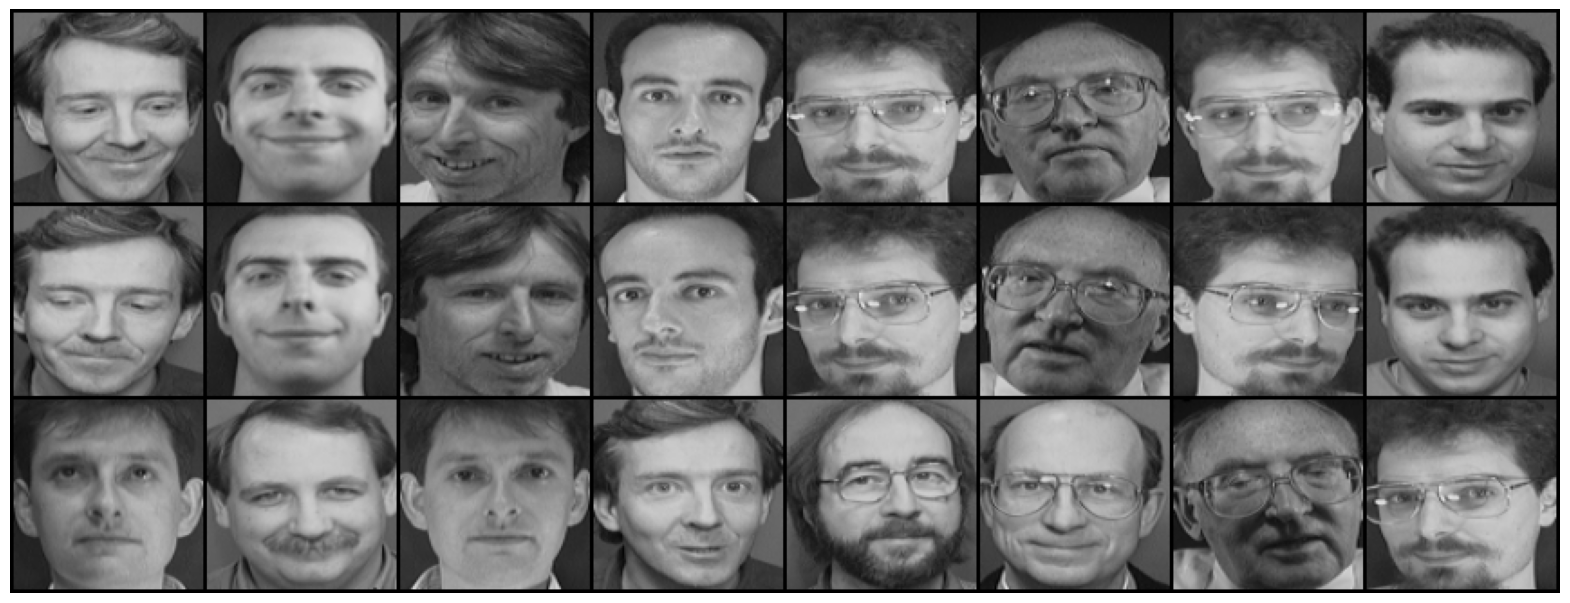

In [ ]:
import matplotlib.pyplot as plt

anchor, positive, negative = next(iter(train_loader))

# 8 - number of samples to visualise
anchor, positive, negative = anchor[:8], positive[:8], negative[:8]

# Show batch contents
concatenated = torch.cat((anchor, positive, negative), 0)
grid = torchvision.utils.make_grid(concatenated)

plt.axis("off")
plt.imshow(grid.permute(1, 2, 0).numpy())
plt.gcf().set_size_inches(20, 60)
plt.show()

В каждом столбце тройка изображений. Первое и второе принадлежат одному человеку, третье — другому.

### Создание модели

Нас устроит любая модель для работы с изображениями. Например, ResNet18.

Все, что от нас требуется, это:
- заменить последний слой,
- отправлять на анализ три изображения вместо одного. Соответственно, на выходе тоже будут три эмбеддинга.

Пожалуй, единственный вопрос — это размерность последнего слоя. В промышленных системах распознавания лиц, которые тренируются на датасетах из миллионов изображений, используются эмбеддинги размерностью от 128 до 512.

Для демонстрационной задачи нам должно хватить 32 значения. Количество выходов последнего линейного слоя установим равным 32.

In [ ]:
!pip install -q timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 10.9 MB/s eta 0:00:00


In [ ]:
import timm


class SiameseNet(nn.Module):
    def __init__(self, embedding_dim=32):
        super().__init__()
        # Replace ImageNet 1000 class classifier to linear layer with embedding_dim outputs
        self.model = timm.create_model(
            "resnet18.a1_in1k", num_classes=embedding_dim, pretrained=False
        )

        # Because we use grayscale images reduce input channel count to one
        # and reduce kernel_size to process images smaller than ImageNet
        self.model.conv1 = nn.Conv2d(
            1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False
        )

    def forward(self, anchor, positive, negative):
        output_a = torch.nn.functional.normalize(self.model(anchor))
        output_p = torch.nn.functional.normalize(self.model(positive))
        output_n = torch.nn.functional.normalize(self.model(negative))

        return output_a, output_p, output_n

### Обучение

Отличие от  сетей для классификации в том, что у модели 3 выхода, и все их надо передать в функцию потерь. При этом нет меток в явном виде.
Определить, какой эмбеддинг относится к позитивному образцу, а какой — к негативному, можно только порядком их следования.

В качестве функции расстояния в Triplet Loss возьмем косинусное расстояние (величина, обратная к косинусной близости).

In [ ]:
class LitSiamese(L.LightningModule):
    def __init__(self, model):
        super().__init__()
        self.model = model

        self.criterion = nn.TripletMarginWithDistanceLoss(
            margin=1.0, distance_function=lambda x, y: 1.0 - F.cosine_similarity(x, y)
        )

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-3)

    def training_step(self, batch, batch_idx):
        anc, pos, neg = batch

        output_a, output_p, output_n = self.model(anc, pos, neg)
        loss = self.criterion(output_a, output_p, output_n)

        self.log("train_loss", loss)

        return loss

    def forward(self, anchor, positive, negative):
        return self.model(anchor, positive, negative)

Обучим модель.

In [ ]:
!mkdir lightning_logs
!mkdir lightning_logs/SiameseNetwork

In [ ]:
from lightning.pytorch.loggers import TensorBoardLogger

L.seed_everything(42)

embedding_dim = 32
model = LitSiamese(SiameseNet(embedding_dim))

logger = TensorBoardLogger(save_dir="lightning_logs", name="SiameseNetwork")
trainer = L.Trainer(max_epochs=20, logger=logger, log_every_n_steps=1)

trainer.fit(model, train_loader)

INFO: Seed set to 42
INFO:lightning.fabric.utilities.seed:Seed set to 42
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name      | Type                          | Params
------------------------------------------------------------
0 | model     | SiameseNet                    | 11.2 M
1 | criterion | TripletMarginWithDistanceLoss | 0     
------------------------------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.736    Total estimated model params size (MB)
INFO:lightnin

Training: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=20` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


### Проверка

Для начала выведем тройки изображений из проверочного датасета и посмотрим на косинусную близость (схожесть) для позитивных и негативных пар. Если модель обучилась, схожесть для позитивных пар будет больше, чем для негативных.

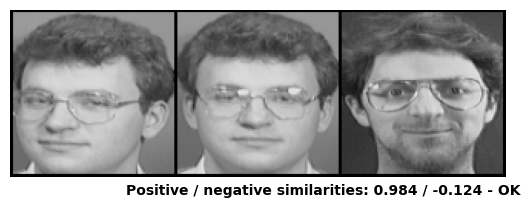

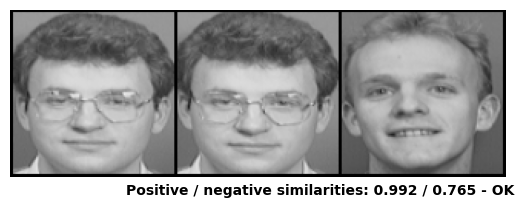

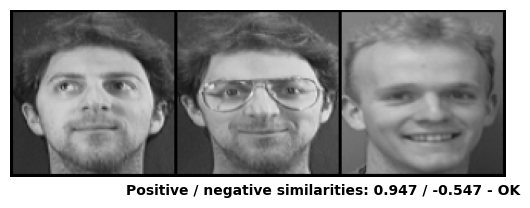

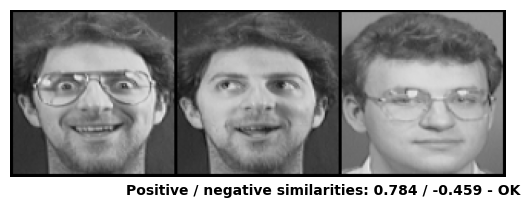

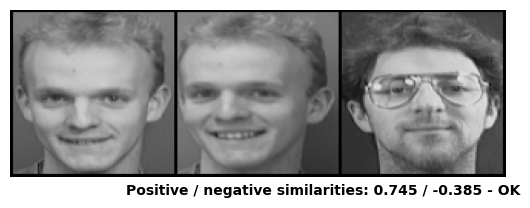

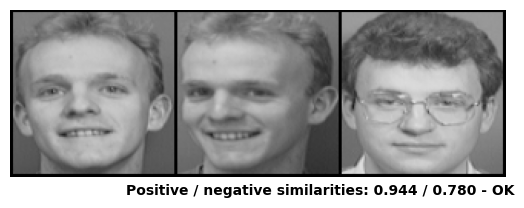

In [ ]:
# Helper method for visualization
def show(img, text=None):
    img_np = img.cpu().numpy()
    plt.axis("off")
    plt.text(75, 120, text, fontweight="bold")
    plt.imshow(np.transpose(img_np, (1, 2, 0)))  # [CxHxW] -> [HxWxC] for imshow
    plt.show()


def plot_imgs(model, test_loader):
    similarity_pos = []
    similarity_neg = []
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(test_loader):
            anc, pos, neg = batch
            output_a, output_p, output_n = model(anc, pos, neg)

            # compute Cosine Similarity
            sim_pos = F.cosine_similarity(output_a, output_p).item()
            sim_neg = F.cosine_similarity(output_a, output_n).item()

            similarity_pos.append(sim_pos)
            similarity_neg.append(sim_neg)

            if not i % 5:
                concatenated = torch.cat((anc, pos, neg))
                result = "OK" if sim_neg < sim_pos else "BAD"
                show(
                    torchvision.utils.make_grid(concatenated),
                    f"Positive / negative similarities: {sim_pos:.3f} / {sim_neg:.3f} - {result}",
                )

    return similarity_pos, similarity_neg


set_random_seed(42)
similarity_pos, similarity_neg = plot_imgs(model, test_loader)

Но такая оценка субъективна. Давайте посмотрим на распределение схожестей по категориям:

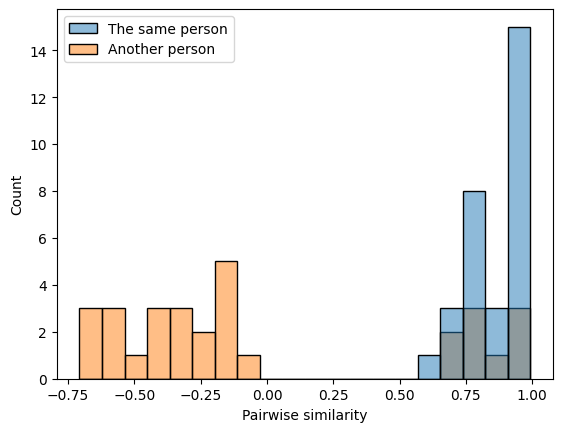

In [ ]:
import seaborn as sns

similarities = {"The same person": similarity_pos, "Another person": similarity_neg}

ax = sns.histplot(similarities, bins=20)
ax.set(xlabel="Pairwise similarity")
plt.show()

Видно, что схожесть между двумя фотографиями одного и того же человека в среднем больше, чем схожесть между фотографиями разных людей.

Если бы мы проектировали систему распознавания лиц, нужно было бы выбрать порог, чтобы сравнивать с ним схожесть и принимать решение о том, верифицировать фото как подлинное или нет.

Соответственно, для нашего игрушечного датасета такой порог следует выбрать $≈0.25$. При этом мы будем иметь малое количество ошибок первого и второго рода.

<font size = "5">Заключение по Mertric learning</font>

В случае, когда у нас не только мало данных, но еще и очень большое (возможно, неизвестное) число классов, можно воспользоваться подходом Metric learning. В этом случае нейронная сеть обучается не классифицировать объекты, а отображать их в пространство признаков — эмбеддингов. При этом абстрактная схожесть исходных объектов должна отражаться в метрической близости эмбеддингов. Для этого используются нейронные сети, относящиеся к классу сиамских нейронных сетей.

# Автоэнкодеры (AE)

Другим подходом к обучению представлений являются **автоэнкодеры** — специальный класс нейросетевых архитектур, способный **обучаться на данных без разметки (unsupervised learning)**.

С помощью автоэнкодеров становится возможным обучать представления для данных, не имея разметку. Эти представления могут затем использоваться для решения других задач:
* понижение размерности,
* очистка данных от шумов,
* предобучение для дальнейшего дообучения на размеченных данных,
* обнаружение аномалий,
* и даже генерация новых данных!


## Архитектура автоэнкодера

Автоэнкодер — архитектура нейросети, которая сначала с помощью нейросети-энкодера сжимает признаковое описание объекта в вектор небольшой размерности (он называется скрытым (латентным) представлением), а затем восстанавливает этот вектор в исходное признаковое пространство с помощью нейросети-декодера.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/autoencoder_architecture.png" alt="alttext" width="400">


## Очищение изображения от шумов

Одно из применений автоэнкодеров — очищение данных от шумов. Такое принципиально возможно из-за того, что размерность латентного пространства очень мала по сравнению с размерностью входного пространства — в нём попросту "нет места" случайному шуму, но зато есть место для общих закономерностей из входного пространства.

То есть мы подаём на обучении автоэнкодера такой зашумлённый датасет, что в нём на самом деле есть некое пространство свойств, которое его описывает. На выходе энкодера в изображении останутся именно эти свойства. Шум является внешним свойством и не сможет закодироваться.

Иными словами, за счет кодировщика и декодировщика автоэнкодер выучивается «проецировать» объекты на латентное пространство и восстанавливать их из него. Если шум небольшой, то автоэнкодер спроецирует объект в нужное место в латентном пространстве и обратно восстановит его уже без шума.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/autoencoder_clean_noise.png" alt="alttext" width="700">


При этом важно понимать, что если шум поместит наш объект так, что автоэнкодеру придется выбирать между разными вариантами проекции, могут возникнуть артефакты.

В случае, приведенном на рисунке, зашумленному $x$ соответствуют две группы объектов из реального датасета. Если мы, к примеру, оптимизируем MSE, то автоэнкодеру «экономнее» всего будет восстанавливать нечто между двумя группами. При этом этого «нечто» в природе не существует или оно очень маловероятно.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/reconstructed_between_2_distribution.png" alt="alttext" width="400">


### Добавление шума к исходной выборке

Также в случае отсутствия шума в изначальной выборке, ее малом размере и т. д. можно добавлять шум к самим исходным данным, получая из объекта $x$ объект $\tilde{x}$ и требуя от энкодера восстановить на основе зашумленного объекта исходный.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/denoising_autoencoder.png" alt="alttext" width="500">


Этот подход может работать и является примером *аугментации данных*. Он может дополнительно заставить автоэнкодер выучить полезные признаки, т. е. его можно использовать, даже если целью не является получение автоэнкодера, избавляющего данные от шума.

С ним, однако, надо быть очень аккуратным:

1. Шум, который вы добавляете, не должен сильно менять исходный объект. Если это происходит, то либо автоэнкодер легко будет находить места, где был добавлен шум, и при этом делать ему это будет легче, чем учить сжатое представление данных. Либо автоэнкодер выучит о ваших данных что-то такое, чего там на самом деле быть не может. К примеру, если добавить к признакам, которые всегда целые, нормальный шум, ничего хорошего не выйдет.

2. Шум должен соответствовать «естественному шуму». Если реальный шум в данных отличается от того, на котором учился автоэнкодер, есть вероятность, что он не будет очищать данные от исходного шума.

## Реализация автоэнкодера

Итак, вспомним, что в автоэнкодере одна сеть переводит пространство свойств в пространство меньшей размерности, а другая сеть обучается восстанавливать исходные объекты. Для обучения нужно определить функцию потерь. Обычно используют среднеквадратичное расстояние (MSE). То есть мы требуем, чтобы значения пикселей исходного и восстановленного изображений отличались несильно. В нашем примере будем использовать Binary Cross-Entropy, она обеспечивает лучшую сходимость.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/nn_encoder_nn_decoder.png" alt="alttext" width="700">

Мы можем использовать любую сеть для энкодера и декодера: на полносвязных слоях или на свёрточных.

### Архитектура

Теперь нужно задать архитектуру модели. Мы будем использовать последовательную модель (Sequential) и свёрточную  архитектуру. В конце кодировщика должен быть вектор с размером `latent_dim`. И декодировщик должен принимать этот вектор и восстанавливать до целого изображения.

In [ ]:
import torch.nn as nn


class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()

        hidden_dims = [32, 64, 128, 256]  # num of filters in layers
        modules = []
        in_channels = 1  # initial value of channels
        for h_dim in hidden_dims:  # conv layers
            modules.append(
                nn.Sequential(
                    nn.Conv2d(
                        in_channels=in_channels,  # num of input channels
                        out_channels=h_dim,  # num of output channels
                        kernel_size=3,
                        stride=2,  # convolution kernel step
                        padding=1,  # save shape
                    ),
                    nn.BatchNorm2d(h_dim),
                    nn.LeakyReLU(),
                )
            )
            in_channels = h_dim  # changing number of input channels for next iteration

        modules.append(nn.Flatten())  # to vector, size 256 * 2 * 2 = 1024
        modules.append(nn.Linear(256 * 2 * 2, latent_dim))

        self.encoder = nn.Sequential(*modules)

    def forward(self, x):
        x = self.encoder(x)
        return x


class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()

        hidden_dims = [256, 128, 64, 32]  # num of filters in layers
        self.linear = nn.Linear(in_features=latent_dim, out_features=1024)

        modules = []
        for i in range(len(hidden_dims) - 1):  # define upsample layers
            modules.append(
                nn.Sequential(
                    nn.Upsample(scale_factor=2),
                    nn.Conv2d(
                        in_channels=hidden_dims[i],
                        out_channels=hidden_dims[i + 1],
                        kernel_size=3,
                        padding=1,
                    ),
                    nn.BatchNorm2d(hidden_dims[i + 1]),
                    nn.LeakyReLU(),
                )
            )

        modules.append(
            nn.Sequential(
                nn.Upsample(scale_factor=2),
                nn.Conv2d(in_channels=hidden_dims[-1], out_channels=1, kernel_size=5),
            )
        )

        self.decoder = nn.Sequential(*modules)

    def forward(self, x, with_sigmoid=False):
        x = self.linear(x)  # from latents space to Linear
        x = x.view(-1, 256, 2, 2)  # reshape
        x = self.decoder(x)  # reconstruction
        if with_sigmoid:
            x = F.sigmoid(x)
        return x

Посмотрим на архитектуру при размере входных данных `(1, 28, 28)` и размере скрытого представления `latent_dim = 2`:

In [ ]:
from torchsummary import summary

latent_dim = 2

encoder = Encoder(latent_dim=latent_dim)
print(">>> Encoder")
print(summary(encoder, (1, 28, 28), device="cpu"))

decoder = Decoder(latent_dim=latent_dim)
print(">>> Decoder")
print(summary(decoder, (1, latent_dim), device="cpu"))

### Код обучения

Для обучения автоэнкодеров воспользуемся фреймворком Lightning.

Основные методы, на которые следует обратить внимание — это `training_step` и `test_step`. Внутри них будет определяться логика того, как данные проходят через автоэнкодер (а также как рассчитывается функция потерь для `training_step`).

В случае простого автоэнкодера (более сложные модификации мы рассмотрим далее в лекции) все устроено следующим образом:
* во время прохода данных через автоэнкодер они сначала кодируются в латентное представление с помощью энкодера:
  
  `latent = self.encoder(data)`
  
  a затем декодер восстанавливает данные из латентного представления:

  `recon = self.decoder(latent)`

* в качестве функции потерь рассчитывается бинарная кросс-энтропия между входными данными и восстановленными на выходе декодера данными:

  `loss = F.binary_cross_entropy_with_logits(recon, data)`.


Во время тестирования модели будет создаваться словарь `self.test_result`. Этот словарь будет содержать 4 ключа: `real`, `recon`, `latent` и `labels`, значениями для которых будут NumPy-массивы, содержащие входные тестовые данные, результаты их восстановления, их латентные представления и метки классов соответственно. Методы `reset_test_result` и `update_test_result` обслуживают логику создания такого словаря с результатами.

In [ ]:
!pip install -q lightning

In [ ]:
import lightning as L
import torch.nn.functional as F
from collections import defaultdict


class LitAE(L.LightningModule):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def training_step(self, batch, batch_idx):
        data, labels = batch

        # here is the logic how data is moved through AE
        latent = self.encoder(data)
        recon = self.decoder(latent)

        # here is the loss function computing
        loss = F.binary_cross_entropy_with_logits(recon, data)

        self.log("train_loss", loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=1e-4)

    def on_test_epoch_start(self):
        # create dict with empty tensors for further accumulating over batches
        self.test_result = defaultdict(torch.Tensor)

    def test_step(self, batch, batch_idx):
        data, labels = batch

        # here is the logic how data is moved through AE
        latent = self.encoder(data)
        recon = self.decoder(latent, with_sigmoid=True)

        self.update_test_result(data, recon, latent, labels)

    def update_test_result(self, data, recon, latent, labels):
        # accumulating results every batch
        self.test_result["real"] = torch.cat([self.test_result["real"], data.cpu()])
        self.test_result["recon"] = torch.cat([self.test_result["recon"], recon.cpu()])
        self.test_result["latent"] = torch.cat(
            [self.test_result["latent"], latent.cpu()]
        )
        self.test_result["labels"] = torch.cat(
            [self.test_result["labels"], labels.cpu()]
        )

    def on_test_epoch_end(self):
        # simply change type from torch tensor to numpy array
        # for every item in test_result dictionary
        for key in self.test_result:
            self.test_result[key] = self.test_result[key].numpy()

Загрузим и подготовим датасет MNIST:

In [ ]:
import torchvision
from torchvision.datasets import MNIST
from IPython.display import clear_output

root = "./data"

train_set = MNIST(
    root=root, train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_set = MNIST(
    root=root, train=False, transform=torchvision.transforms.ToTensor(), download=True
)
clear_output()

In [ ]:
import torch

torch.manual_seed(42)

batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True, num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=batch_size, shuffle=False, num_workers=2
)

Создадим автоэнкодер с размером латентного представления 2 (для возможности отображения латентных представлений на плоскости) и обучим его в течение 5 эпох:

In [ ]:
!mkdir lightning_logs/AE_latent_dim=2

In [ ]:
from lightning.pytorch.loggers import TensorBoardLogger

L.seed_everything(42)

latent_dim = 2
encoder = Encoder(latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim)

autoencoder = LitAE(encoder, decoder)

logger = TensorBoardLogger(save_dir="lightning_logs", name="AE_latent_dim=2")
trainer = L.Trainer(max_epochs=5, logger=logger)

trainer.fit(autoencoder, train_loader)

### Инференс модели

Запустим тестирование модели на тестовых данных. В результате у модели `autoencoder` появится словарь `test_result`, устройство которого было рассмотрено выше.

In [ ]:
trainer.test(autoencoder, test_loader)
run_res = autoencoder.test_result

Сначала оценим то, как автоэнкодер восстанавливает данные.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def plot_samples(*args, digit_size=28, name=None, single_size=2):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    figure = np.zeros((digit_size * len(args), digit_size * n))

    for i in range(n):
        for j in range(len(args)):
            figure[
                j * digit_size : (j + 1) * digit_size,
                i * digit_size : (i + 1) * digit_size,
            ] = args[j][i].squeeze()

    plt.figure(figsize=(single_size * n, single_size * len(args)))

    plt.imshow(figure, cmap="gray_r", clim=(0, 1))

    plt.grid(False)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if name is not None:
        plt.savefig(name)
    plt.show()

In [ ]:
plot_samples(run_res["real"][0:9], run_res["recon"][0:9])

И посмотрим, какие латентные представления он выучил.

In [ ]:
def plot_manifold(latent_r, labels=None, alpha=0.9, title=None):
    plt.figure(figsize=(8, 8))
    if labels is None:
        plt.scatter(latent_r[:, 0], latent_r[:, 1], alpha=alpha)
    else:
        plt.scatter(latent_r[:, 0], latent_r[:, 1], c=labels, cmap="tab10", alpha=alpha)
        plt.colorbar()

    if title:
        plt.title(title)
    plt.show()

In [ ]:
plot_manifold(run_res["latent"], run_res["labels"], title="AE manifold (latent_dim=2)")

А теперь обучим автоэнкодер с размерностью латентного пространства, равной 24, и посмотрим, как он будет бороться с шумом.

In [ ]:
!mkdir lightning_logs/AE_latent_dim=24

In [ ]:
L.seed_everything(42)

latent_dim = 24
encoder = Encoder(latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim)

autoencoder = LitAE(encoder, decoder)

logger = TensorBoardLogger(save_dir="lightning_logs", name="AE_latent_dim=24")
trainer = L.Trainer(max_epochs=5, logger=logger)

trainer.fit(autoencoder, train_loader)

Оценим, как автоэнкодер с размерностью латентного пространства 24 восстанавливает данные.

In [ ]:
trainer.test(autoencoder, test_loader)
run_res = autoencoder.test_result
plot_samples(run_res["real"][0:9], run_res["recon"][0:9])

Размерность латентного пространства `latent_dim` равна 24, что значительно меньше исходного количества признаков (784), поэтому мы получили неплохое сжатие изображения.

А теперь оценим, справится ли он с очисткой изображений от шумов. Отметим, что мы не добавляли шум на входные изображения при обучении. Сделаем `DataLoader`, который добавляет в наш датасет шум автоматически с помощью трансформации.

In [ ]:
class AddGaussianNoise:
    def __init__(self, mean=0.0, std=1.0):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + f"(mean={self.mean}, std={self.std})"

Загрузим MNIST с добавленным шумом

In [ ]:
torch.manual_seed(42)

test_noise_set = MNIST(
    root=root,
    train=False,
    transform=torchvision.transforms.Compose(
        [torchvision.transforms.ToTensor(), AddGaussianNoise(0.0, 0.10)]
    ),
    download=True,
)

test_noised_loader = torch.utils.data.DataLoader(
    torch.utils.data.Subset(test_noise_set, list(range(64))),
    batch_size=batch_size,
    shuffle=False,
    num_workers=2,
)

Запустим тестирование обученной модели на зашумленных данных.

In [ ]:
trainer.test(autoencoder, test_noised_loader)
run_res = autoencoder.test_result

Результат очистки данных от шума после обработки автоэнкодером. Можно увидеть, что шум достаточно хорошо устраняется.

In [ ]:
plot_samples(run_res["real"][0:9], run_res["recon"][0:9])

Помимо понижения размерности и очистки данных от шума, автоэнкодеры имеют еще несколько полезных способов применения, такие как **обнаружение аномалий** и **предобучение на неразмеченных данных**.

## Обнаружение аномалий

Допустим у нас есть много данных, которые можно считать типичными, или "нормальными", и небольшое количество данных, являющихся нетипичными, или "аномальными". На практике в нашем распоряжении может вообще не быть аномальных примеров, но мы можем ожидать, что они появятся в будущем, и мы бы хотели, чтобы модель могла отличить аномальные примеры от нормальных.

В такой постановке можно **обучить автоэнкодер только на данных, которые мы считаем нормальными**. В тестовую выборку мы включим аномальные примеры, если они имеются, а также некоторое количество нормальных примеров.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/ae_anomaly_detection_data.png" width="800">

Мы будем обучать автоэнкодер только на нормальных данных (иллюстрация ниже, слева). При обучении автоэнкодер будет минимизировать ошибку между входом и выходом (*ошибка реконструкции*).

Завершив обучение, мы вычисляем значения ошибки реконструкции на обучающих примерах и строим распределение этих ошибок, по которому мы выбираем порог ошибки реконструкции (threshold). Порог выбирается, исходя из задачи и требований к детекции. Он зависит от того, что для нас важнее: чаще находить аномалии или не допускать ложных срабатываний на "нормальных" объектах.

На этапе применения модели (inference, иллюстрация ниже, справа) мы подаем на обученный автоэнкодер как нормальные, так и аномальные примеры. **Нормальные примеры будут восстанавливаться автоэнкодером с малой ошибкой**, так как подобные примеры встречались во время обучения. Аномальные же примеры не встречались автоэнкодеру во время обучения, и он не сможет их качественно восстанавливать. **Ошибка реконструкции аномальных объектов будет большой.**

Сравнивая ошибку реконструкции с вычисленным ранее порогом, мы сможем обнаруживать и отделять аномальные примеры.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/ae_anomaly_detection_method.png" width="1000">

## Предобучение на неразмеченных данных

Еще одним практическим примером использования автоэнкодеров является предобучение на неразмеченных данных. Пусть мы имеем **большое количество неразмеченных данных и немного размеченных** (semi-supervised подход).

Мы можем обучить автоэнкодер на неразмеченных данных, ожидая, что он обучится эффективно представлять данные в латентном пространстве.

Затем мы используем **энкодер как предобученный экстрактор признаков**, добавляя к нему дополнительный классификатор, и обучаем такую модель на размеченных данных.

Такой подход похож на transfer learning, где мы тоже используем предобученный экстрактор признаков для решения задачи на небольшом количестве размеченных данных. Отличие в том, что **при transfer learning экстрактор признаков обучается на другой задаче с другими данными**, часто даже на данных из другого домена.

В случае использования автоэнкодера, предобучение происходит на данных той же природы, и мы можем ожидать, что полученный таким образом экстрактор признаков будет более эффективно представлять данные в латентном пространстве.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/ae_pretrain_encoder.png" width="800">

## Автоэнкодер как генератор и его ограничения

Автоэнкодер переводит объекты из исходного признакового пространства в латентное пространство меньшей размерности. Мы можем попытаться использовать **обученный декодер как генератор новых данных**: он будет получать на вход некий вектор из латентного пространства и на выходе восстанавливать изображение. При этом мы можем ожидать, что это изображение окажется в некотором смысле похожим на те, на которых учился автоэнкодер.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/autoencoder_as_generator.png" alt="alttext" width="700">

### Плавная интерполяция

Какое значение вектора выбрать? Мы же никак не управляли латентным пространством. Непонятно, какие числа подставлять. Поэтому мы можем выбрать промежуточные значения между представлениями двух исходных изображений в латентном пространстве и получить плавную интерполяцию между изображениями. Постепенно свойства одного изображения будут исчезать, а свойства другого — появляться.


У нас уже есть обученный автоэнкодер с латентным пространством размерности 24.

Возьмем изображение семерки и шестерки, получим их латентные представления и попробуем сгенерировать изображения из латентных представлений, лежащих на линии линейной интерполяции между семеркой и шестеркой.

In [ ]:
seven = (test_set.data[test_set.targets == 7][2:3] / 255).unsqueeze(0)
six = (test_set.data[test_set.targets == 6][1:2] / 255).unsqueeze(0)

latent_space1 = autoencoder.encoder(seven)
latent_space2 = autoencoder.encoder(six)

In [ ]:
interp_steps = 10
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1.repeat(interp_steps, 1),
    latent_space2.repeat(interp_steps, 1),
    weight=weight.view(-1, 1),
)
iterp_imgs = autoencoder.decoder(interp, with_sigmoid=True)

In [ ]:
_, axs = plt.subplots(nrows=1, ncols=interp_steps, figsize=(16, 4))
for step in range(0, interp_steps):
    figure = iterp_imgs[step].cpu().detach().numpy()
    figure = figure.reshape(28, 28)
    ax = axs[step]
    ax.imshow(figure, cmap="gray_r", clim=(0, 1))
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False);

Чтобы увидеть более плавные изменения, можем сделать видео с большим количеством кадров (промежуточных представлений на линии интерполяции). Для этого можно использовать библиотеку OpenCV.

In [ ]:
from PIL import Image

interp_steps = 200
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1.repeat(interp_steps, 1),
    latent_space2.repeat(interp_steps, 1),
    weight=weight.view(-1, 1),
)
iterp_imgs = autoencoder.decoder(interp, with_sigmoid=True)

resize_coeff = 10
imgs = np.squeeze(iterp_imgs.cpu().detach().numpy())
size = (imgs.shape[1] * resize_coeff, imgs.shape[2] * resize_coeff)


imgs = [
    Image.fromarray(np.uint8(255 - img * 255)).resize(size).convert("RGB")
    for img in imgs
]
imgs[0].save(
    "ae_img.gif",
    save_all=True,
    append_images=imgs[1:],
    optimize=False,
    duration=40,
    loop=0,
)

In [ ]:
from IPython.display import Image as iImage

iImage(open("ae_img.gif", "rb").read())

Так себе интерполяция вышла. Старое изображение затухает, а новое изображение появляется. Хочется, чтобы в промежуточных кадрах не было каких-то непонятных очертаний, а изображение было чем-то промежуточным по смыслу между стартовым и конечным изображением.

### Ограничения декодера как генератора

Причина получения не похожих на реальные цифры промежуточных изображений заключается в том, что в результате обучения в латентном пространстве возникли "пустые" зоны, из которых декодер не обучался ничего восстанавливать.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/autoencoder_as_generator_problem.png" alt="alttext" width="500">

Представим это графически. Пусть наш очень умный, содержащий очень много коэффициентов автоэнкодер смог разложить все входные объекты на одной оси (размерность латентного пространства — 1). По сути он каждому входному изображению присвоил номер, и по номеру может это изображение вспомнить. То есть автоэнкодер очень переобученный. Тогда если мы возьмём промежуточный номер (пытаемся интерполировать), то какое изображение мы собираемся получить?

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/autoencoder_as_generator_problem_explanation.png" alt="alttext" width="1000">

Если мы хотим, чтобы декодированные промежуточные латентные состояния имели черты близких к ним объектов, то надо притянуть латентные координаты похожих объектов. Например, вот так:


<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/irregular_and_regular_latent_space.png" alt="alttext" width="1000">

# Вариационные автоэнкодеры (VAE)

Мотивация:

Хотим вместо представления слева получить представление справа:

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/latent_space_with_and_witout_regularization.png" alt="alttext" width="850">



При этом зоны пересечения должны действительно содержать переходные картины:



<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/vae_latent_space.png" alt="alttext" width="400">


Постановка задачи с автоэнкодером говорит нам, что существует некое пространство меньшей размерности $Z$, которое и обуславливает процесс генерации объектов из $X$. Все остальные различия — следствия случайности: один и тот же человек может по-разному написать цифру $5$.

Будем искать латентное пространство $Z$, которое удовлетворяет следующему условию:

$$\large p(x) = \int p(x, z)dz $$

Кроме того, пусть объекты из $Z$ легко генерировать.

По формуле совместной вероятности:

$$\large p(x, z) = p(x|z)p(z) $$

Осталось только подобрать такие параметры, чтобы все работало.

К сожалению, сделать это в таком виде не получится. Пространство $X$ может быть высокоразмерным.

Но мы можем существенно сузить область поиска, ведь каждому $x$ из пространства $X$ соответствует лишь небольшая возможная область в $Z$.

Для этого будем также учить отображение из пространства $X$ в пространство $Z$, т. е. пытаться выучить $p(z|x)$. Назовем функцию, которой будем его приближать, $q(z|x)$.

Что же в случае автоэнкодера выполняет роль $p(x|z)$ и $q(z|x)$?
Очевидно, кодировщик и декодировщик соответственно.


<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/vae_as_two_functions.png" alt="alttext" width="500">


Чтобы все получилось, нужно сделать с кодировщиком две вещи. Заметьте, что декодировщик мы оставим без изменений.

## Сэмплирование в латентном пространстве

Пусть наш кодировщик генерирует на основе объекта $X$ вектор средних и вектор стандартных отклонений.

Этих двух векторов хватает нам для того, чтобы задать многомерное нормальное распределение с независимыми компонентами (чтобы матрица ковариаций была диагональной), соответствующее данному объекту.

Чтобы получить латентное представление объекта, отличающегося от $X$ только в силу случайности, нам достаточно сэмплировать вектор из нормального распределения с такими параметрами.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/vae_architecture_first_modification.png" alt="alttext" width="850">

Далее мы можем требовать, чтобы из полученного латентного представления декодировщик восстанавливал объект, похожий на исходный.

<font size="4">Репараметризация</font>

Здесь, однако, сразу возникает проблема с тем, что граф вычислений, соответствующий предыдущей структуре, не может пропускать градиент — как пропустить градиент через генератор случайного нормального числа? Если считать из определения, то даже малейшему изменению параметра могут соответствовать бесконечные изменения генерируемого числа (нормальное распределение определено на бесконечности).

Но мы можем вспомнить замечательное свойство нормального распределения:

$$\large N(\mu,\sigma^2) = N(0,1) * \sigma + \mu$$

Выполняется это и для многомерного случая. Потому сделаем следующее: будем генерировать значение из нормального распределения со средними 0 и дисперсиями 1, а затем домножать это на вектор стандартных отклонений и прибавлять вектор средних. Получится вот такое преобразование, которое называется **reparameterization trick**.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/reparametrization_trick.png" alt="alttext" width="850">



В отличие от левого случая, в правом мы спокойно можем пропустить градиент через детерминистичные ноды.


Но такой принцип также имеет проблему предыдущего детерминистического подхода, так как вероятностное распределение сможет свернуться в дельта-функцию — зачем нейросети мучиться с объектами, немного отличающимися от тех, что есть в обучающей выборке, и пытаться нормально их восстанавливать, если можно просто начать генерировать стандартные отклонения, близкие к нулю, и тем самым получить $\delta$-функцию, которая будет нашему объекту всегда сопоставлять одну точку в латентном представлении.


<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/Dirac_function_approximation.gif" alt="alttext" width="240">


## Регуляризация латентного пространства

Поэтому нам надо ввести регуляризацию, требующую от каждого распределения быть близким к нормальному распределению вокруг нуля координат латентного пространства с дисперсией $1$ (наше $P(z)$).

Для этого нам нужна некая мера расстояния между двумя вероятностными распределениями. В базовом случае в качестве такой меры расстояния используется **дивергенция Кульбака-Лейблера**, или KL-дивергенция.

[Дивергенция Кульбака-Лейблера 📚[wiki]](https://ru.wikipedia.org/wiki/Расстояние_Кульбака_—_Лейблера) между двумя вероятностными распределениями $P$ и $Q$ определяется следующим образом:

$$\large KL(P||Q) = \int_X p(x)\log \dfrac {p(x)} {q(x)} dx$$

В теории информации $p$ считается целевым (истинным) распределением, а $q$ — тем, с которым мы его сравниваем (проверяемым).

Чтобы распределение $Q(z|x)$ в латентном пространстве $Z$ походило на нормальное, в качестве регуляризации мы будем использовать KL-дивергенцию между $Q(z|x)$ и стандартным нормальным распределением $N(0,1)$.


$$\large \text{Regularization} = KL(Q(z|x)||N(0,1)) $$

Данное выражение может быть [записано аналитически ✏️[blog]](https://stats.stackexchange.com/questions/318748/deriving-the-kl-divergence-loss-for-vaes):


$$\large KL(N(\mu, \sigma) || N(0, 1)) = -\frac {1} {2}(\log {\sigma^2} - \sigma^2 - \mu^2 + 1)$$


<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L12/pure_kl_loss.png" alt="alttext" width="350"></center>

<center><em>Source: <a href="https://www.jeremyjordan.me/variational-autoencoders/">Variational Autoencoders</a></em></center>

Однако нужно не забыть, что на выходе мы все еще ожидаем получить изображение, похожее на входное. Поэтому итоговая функция потерь будет состоять из двух компонент:

1. слагаемое, связанное с качеством восстановления,
2. регуляризационный член.

Формально это записывается следующим образом:

$$\large \text{VAE Loss} = E_{z \sim Q(z|x)}[\log P(x|z)] + KL[Q(z|x)||N(0,1)]$$

А в итоге:

$$\large \text{VAE Loss} = \text{BCE}(x , \tilde{x}) -\frac {1} {2}(\log {\sigma^2} - \sigma^2 - \mu^2 + 1)$$



Учет обеих компонент позволяет нам получить то, что мы хотели — регулярное латентное пространство, где нет «дыр» в представлении, и при этом близкие по смыслу объекты расположены рядом, а далекие — далеко.

## Реализация VAE

Для реализации вариационного автоэнкодера нам потребуется переопределить логику того, как данные проходят через модель. Выход энкодера будет интерпретироваться не как латентное представление входного образа, а как параметры распределения, из которого мы будем сэмплировать латентные представления для подачи в декодер.

Вариационный энкодер фактически ничем не будет отличаться от базового, лишь за исключением того, что размерность выхода должна быть четной — для разделения на $μ$ и $\sigma$.

In [ ]:
class VAEEncoder(Encoder):
    def __init__(self, latent_dim):
        if latent_dim % 2 != 0:  # check for the parity of the latent space
            raise Exception("Latent size for VAEEncoder must be even")

        super().__init__(latent_dim)

Для реализации VAE также воспользуемся фреймворком Lightning. Класс `LitVAE` унаследуем от базового `LitAE`, изменив логику прохождения данных через модель и расчет функции потерь:
* во время прохода данных через автоэнкодер они сначала кодируются в латентное представление с помощью энкодера:
  
  `latent = self.encoder(data)`

  затем латентное представление разделяется на две части $\mu$ и $\sigma$:

  `mu, log_var = self.vae_split(latent)`

  производится репараметризация — сэмплирование из нормального распределения с параметрами, предсказанными энкодером:

  `sample = self.vae_reparametrize(mu, log_var)`
  
  и наконец декодер восстанавливает данные из результата сэмплирования:

  `recon = self.decoder(sample)`

* функция потерь теперь содержит две компоненты:
    
    штраф за некачественное восстановление в виде бинарной кросс-энтропии между входными данными и восстановленными на выходе декодера данными:

    `F.binary_cross_entropy_with_logits(recon, data)`

    и штраф за отличие латентного представления после репараметризации от стандартного нормального распределения в виде KL-дивергенции:

    `kld_loss(mu, log_var)`.

    Эти компоненты суммируются в функции потерь с весами `recon_weight` и `kld_weight`.

Методы `vae_split`, `vae_reparametrize` и `kld_loss` обслуживают описанную логику работы VAE.

In [ ]:
import lightning as L
import torch.nn.functional as F


class LitVAE(LitAE):
    def __init__(self, encoder, decoder, kld_weight=0.005, recon_weight=1.0):
        super().__init__(encoder, decoder)
        self.kld_weight = kld_weight
        self.recon_weight = recon_weight

    def vae_split(self, latent):
        size = (
            latent.shape[1] // 2
        )  # divide the latent representation into mu and log_var
        mu = latent[:, :size]
        log_var = latent[:, size:]
        return mu, log_var

    def vae_reparametrize(self, mu, log_var):
        sigma = torch.exp(0.5 * log_var)
        eps = torch.randn(mu.shape[0], mu.shape[1]).to(self.device)
        return eps * sigma + mu

    def kld_loss(self, mu, log_var):
        var = log_var.exp()
        kl_loss = torch.mean(-0.5 * torch.sum(log_var - var - mu**2 + 1, dim=1), dim=0)
        return kl_loss

    def training_step(self, batch, batch_idx):
        data, labels = batch

        # here is the logic how data is moved through VAE
        latent = self.encoder(data)

        mu, log_var = self.vae_split(latent)
        sample = self.vae_reparametrize(mu, log_var)

        recon = self.decoder(sample)

        # here is the loss function computing
        loss = self.recon_weight * F.binary_cross_entropy_with_logits(
            recon, data
        ) + self.kld_weight * self.kld_loss(mu, log_var)

        self.log("train_loss", loss)
        return loss

    def test_step(self, batch, batch_idx):
        data, labels = batch

        # here is the logic how data is moved through VAE
        latent = self.encoder(data)

        mu, log_var = self.vae_split(latent)
        sample = self.vae_reparametrize(mu, log_var)

        recon = self.decoder(sample, with_sigmoid=True)

        self.update_test_result(data, recon, latent, labels)

### Демонстрация эффекта регуляризации

Для демонстрации того, как работает регуляризация в виде KL-дивергенции, обучим VAE, полностью отключив штраф за качество восстановления (`recon_weight=0`).

Видим, что мы забываем про декодировщик — он может выдавать все, что угодно. Потому логично ожидать, что обучится только кодировщик, и обучится он отражать наши точки в нормальное распределение со средним 0 и дисперсией 1. Можем проверить это.

In [ ]:
!mkdir lightning_logs/VAE_latent_dim=2_KL_only

In [ ]:
L.seed_everything(42)

latent_dim = 2
encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = Decoder(latent_dim=latent_dim)

autoencoder = LitVAE(encoder, decoder, kld_weight=0.1, recon_weight=0.0)  # bad practice

logger = TensorBoardLogger(save_dir="lightning_logs", name="VAE_latent_dim=2_KL_only")
trainer = L.Trainer(max_epochs=5, logger=logger)

trainer.fit(autoencoder, train_loader)

Протестируем обученный VAE и рассмотрим генерируемые им параметры распределения $\mu$ и $\sigma$.

In [ ]:
trainer.test(autoencoder, test_loader)
run_res = autoencoder.test_result

mu, log_var = autoencoder.vae_split(run_res["latent"])
var = np.exp(log_var)

Все генерируемые средние почти неотличимы от нуля, а дисперсии — от единицы:

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist(mu.ravel())
plt.xlabel("$\mu$", fontsize=20)

plt.subplot(1, 2, 2)
plt.hist(var.ravel())
plt.xlabel("$\sigma^2$", fontsize=20)

plt.show()

В результате получаем практически неразделимые объекты:

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")

mu, log_var = torch.tensor(mu), torch.tensor(log_var)
sample = autoencoder.vae_reparametrize(mu, log_var).numpy()

pal = sns.color_palette("Paired", n_colors=10)
plot_manifold(sample, run_res["labels"], title="Manifold mu")

### Совмещение ошибки восстановления и KL-дивергенции

<center><img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L12/kl_repr_loss.png" alt="alttext" width="350"></center>

<center><em>Source: <a href="https://www.jeremyjordan.me/variational-autoencoders/">Variational Autoencoders</a></em></center>

Обучим VAE, штрафуя его и за качество восстановления (` recon_weight=1.0`), и за отличие распределения латентных представлений от стандартого нормального (`kld_weight=0.005`):

In [ ]:
!mkdir lightning_logs/VAE_latent_dim=2

In [ ]:
L.seed_everything(42)

latent_dim = 2
encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = Decoder(latent_dim=latent_dim)

autoencoder = LitVAE(encoder, decoder, kld_weight=0.005, recon_weight=1.0)

logger = TensorBoardLogger(save_dir="lightning_logs", name="VAE_latent_dim=2")
trainer = L.Trainer(max_epochs=5, logger=logger)

trainer.fit(autoencoder, train_loader)

In [ ]:
trainer.test(autoencoder, test_loader)
run_res = autoencoder.test_result

mu, log_var = autoencoder.vae_split(run_res["latent"])

mu, log_var = torch.tensor(mu), torch.tensor(log_var)
sample = autoencoder.vae_reparametrize(mu, log_var).numpy()

In [ ]:
pal = sns.color_palette("Paired", n_colors=10)
plot_manifold(sample, run_res["labels"])

Видим, что цифры разделились в пространстве, но при этом жмутся друг к другу. При этом, что интересно, 4 и 9 почти неотличимы. Это можно объяснить тем, что двух компонент недостаточно, чтобы разделить настолько похожие цифры (по сути, все отличие в заполненности области между двумя рожками 4).

## Плавная интерполяция

Посмотрим, как теперь получится интерполировать между теми же цифрами 7 и 6. Для сравнения с результатом, полученным обычным автоэнкодером, возьмем размерность латентного пространства такую же, как у него (24).

In [ ]:
!mkdir lightning_logs/VAE_latent_dim=24

In [ ]:
L.seed_everything(42)

latent_dim = 24
encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = Decoder(latent_dim=latent_dim)

autoencoder = LitVAE(encoder, decoder)

logger = TensorBoardLogger(save_dir="lightning_logs", name="VAE_latent_dim=24")
trainer = L.Trainer(max_epochs=5, logger=logger)

trainer.fit(autoencoder, train_loader)

In [ ]:
seven = (test_set.data[test_set.targets == 7][2:3] / 255).unsqueeze(0)
six = (test_set.data[test_set.targets == 6][1:2] / 255).unsqueeze(0)

latent_space1_mu, _ = autoencoder.vae_split(autoencoder.encoder(seven))
latent_space2_mu, _ = autoencoder.vae_split(autoencoder.encoder(six))

In [ ]:
interp_steps = 10
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1_mu.repeat(interp_steps, 1),
    latent_space2_mu.repeat(interp_steps, 1),
    weight=weight.view(-1, 1),
)
iterp_imgs = autoencoder.decoder(interp, with_sigmoid=True)
_, axs = plt.subplots(nrows=1, ncols=interp_steps, figsize=(16, 4))
for step in range(0, interp_steps):
    figure = iterp_imgs[step].cpu().detach().numpy()
    figure = figure.reshape(28, 28)
    ax = axs[step]
    ax.imshow(figure, cmap="gray_r", clim=(0, 1))
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False);

Видим плавную интерполяцию. Посмотрим на примере с видео.

In [ ]:
from PIL import Image

interp_steps = 200
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1_mu.repeat(interp_steps, 1),
    latent_space2_mu.repeat(interp_steps, 1),
    weight=weight.view(-1, 1),
)
iterp_imgs = autoencoder.decoder(interp, with_sigmoid=True)


resize_coeff = 10
imgs = np.squeeze(iterp_imgs.cpu().detach().numpy())
size = (imgs.shape[1] * resize_coeff, imgs.shape[2] * resize_coeff)


imgs = [
    Image.fromarray(np.uint8(255 - img * 255)).resize(size).convert("RGB")
    for img in imgs
]
imgs[0].save(
    "vae_img.gif",
    save_all=True,
    append_images=imgs[1:],
    optimize=False,
    duration=40,
    loop=0,
)

In [ ]:
from IPython.display import Image as iImage

iImage(open("vae_img.gif", "rb").read())

Семерка стремится сперва перевестись в девятку, которая затем переходит в шестерку, попутно представляя что-то похожее на восьмерку. Похоже, линия интерполяции теперь в меньшей степени проходит через "пустоты", из которых декодер не умеет восстанавливать что-то похожее на реальные цифры.

Если мы используем размерность латентного пространства 2, то это позволит нам получать распределение классов цифр на плоскости, типа такого:


<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L12/vae_sampling.png" alt="alttext" width="350">

<em>Source: <a href="https://habr.com/ru/articles/331552/">Автоэнкодеры в Keras, Часть 3: Вариационные автоэнкодеры (VAE)</a></em>



Это не просто интерполяция по двум направлениям. Тут именно все 10 цифр должны так занять место на плоскости, чтобы плавно перетекать друг в друга.

Проверим наконец, что вариационный автоэнкодер работает как автоэнкодер и может, к примеру, убирать шум.

In [ ]:
trainer.test(autoencoder, test_noised_loader)
run_res = autoencoder.test_result

plot_samples(run_res["real"][0:9], run_res["recon"][0:9])

Аналогично посмотрим, как он восстанавливает изображения

In [ ]:
trainer.test(autoencoder, test_loader)
run_res = autoencoder.test_result

plot_samples(run_res["real"][0:9], run_res["recon"][0:9])

Работает, но изображения получаются "размытыми". Это следствие сэмплирования из нормального распределения.

## Векторная арифметика

В принципе, можно даже в латентном пространстве брать разницу черт написания двух одинаковых цифр, прибавлять к другой цифре, получая в результате цифру, написанную немного по-другому.

Такое можно делать и для других областей. Например, при генерации фотографий лиц в латентном пространстве можно найти координату, отвечающую за "бородатость" лица. Прибавляя к латентному вектору лица без бороды вектор той или иной меры "бородатости", можно генерировать в той или иной степени бородатые лица.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/vector_arithmetic_add_new_property.png" alt="alttext" width="500">

Подробнее:

У нас есть 1, написанная без наклона, и 1, написанная с наклоном.
И у нас есть 9 без наклона.

Вычитаем из девятки единицу без наклона и прибавляем единицу с наклоном. Если все пройдет хорошо, получим девятку с наклоном.





<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L12/vector_arithmetic_example.png" alt="alttext" width="550">

<em>Source: <a href="https://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/#:~:text=First%2C%20let%E2%80%99s%20get,the%20autoencoded%20version">Generating Large Images from Latent Vectors</a></em>




Попробуем это сделать сами

In [ ]:
imgs, labels = next(iter(test_loader))
real_9_straight = imgs[labels == 9][6:7]  # find some straight "nine"
real_1_straight = imgs[labels == 1][3:4]  # find some straight "one"
real_1_tilted = imgs[labels == 1][0:1]  # find some tilted "one"

In [ ]:
size = (256, 256)
Image.fromarray(np.uint8(255 - np.squeeze(real_9_straight.numpy()) * 255)).resize(size)

In [ ]:
Image.fromarray(np.uint8(255 - np.squeeze(real_1_straight.numpy()) * 255)).resize(size)

In [ ]:
Image.fromarray(np.uint8(255 - np.squeeze(real_1_tilted.numpy()) * 255)).resize(size)

In [ ]:
latent_9_straight, _ = autoencoder.vae_split(autoencoder.encoder(real_9_straight))
latent_1_straight, _ = autoencoder.vae_split(autoencoder.encoder(real_1_straight))
latent_1_tilted, _ = autoencoder.vae_split(autoencoder.encoder(real_1_tilted))

In [ ]:
latent_9_tilted = latent_9_straight - latent_1_straight + latent_1_tilted
gen_9_tilted = autoencoder.decoder(latent_9_tilted, with_sigmoid=True)

In [ ]:
Image.fromarray(
    np.uint8(255 - np.squeeze(gen_9_tilted.cpu().detach().numpy()) * 255)
).resize(size)

Удалось перенести наклон единицы на девятку. Получилось неплохо, однако простой VAE не гарантирует того, что "фокус удастся". Для получения возможности использовать векторную арифметику могут применяться специальные функции потерь и архитектуры.

## Ограничения VAE

Одна из проблем VAE, с которой можно столкнуться, состоит в том, что две компоненты функции потерь конфликтуют друг с другом. Если будет доминировать KL-loss, то мы получим представление, из которого наши объекты очень плохо восстанавливаются — они раскиданы по представлению, как угодно.

Если же, наоборот, будет доминировать reconstruction loss, то мы получим ситуацию, в которой объекты восстанавливаются нормально, однако в латентном пространстве есть пустоты.

Проблема возникает и с самой KL-дивергенцией, у которой есть ряд существенных недостатков. Есть другие способы оценки близости двух распределений, которые порой дают лучшие результаты. К ним относятся дивергенция Йенсена — Шеннона и метрика Вассерштейна (используется в Wasserstein autoencoders), изучение которых выходит за рамки курса.

Кроме того, в случае, когда декодировщик содержит значительно больше параметров, нежели кодировщик, может возникать ситуация, при которой сгенерированное латентное представление игнорируется.

# Условные вариационные автоэнкодеры (CVAE)

## Реализация CVAE

Как, используя обычный VAE, сгенерировать картинку с заданной меткой?

На самом деле, задача нетривиальна. Как вариант, мы можем понять, в какие области латентного пространства VAE отображает разные цифры, и затем сэмплировать уже из этих областей.

Хорошо, а если мы хотим нарисовать единицу тем же почерком, которым нарисована данная нам тройка? В этом случае классический VAE вообще не получится использовать.

В случае, если мы имеем априорную информацию, например, разметку изображений по классам, мы можем подавать ее в модель при обучении. Тем самым мы можем *обуславливать* декодировщик на генерацию объекта конкретного класса. Таким образом мы можем получить Conditional VAE (CVAE).

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/cvae_scheme.png" alt="alttext" width="850">


Как подмешивать метку к изображению, чтобы передать это полностью свёрточной нейронной сети, не очевидно и обычно не нужно. Часто достаточно передавать метку только декодеру. Энкодер имеет в распоряжении изначальный объект и при желании может предсказать его метку сам.

Напишем код для CVAE. По сути надо поменять только декодер.

Для кодирования метки класса добавим в декодер слой `label_embedding`, содержащий модуль `nn.Embedding`. Этот модуль будет обучать векторные представления меток классов и переводить их в вектора с размерностью `class_dim`. Размерность этих эмбеддингов, в общем случае, должна быть сопоставима с размерностью скрытого представления самого автоэнкодера.

Во время работы мы будем конкатенировать латентное представление, полученное после репараметризации выхода энкодера, с векторным представлением метки класса. Для этого требуется изменить количество входов линейного слоя декодера.

In [ ]:
class CDecoder(Decoder):
    def __init__(self, latent_dim, class_dim):
        super().__init__(latent_dim)

        self.label_embedding = nn.Embedding(num_embeddings=10, embedding_dim=class_dim)

        linear_out_features = self.linear.out_features

        # linear will take latent vector concatenated with label embedding
        self.linear = nn.Linear(
            in_features=latent_dim + class_dim,
            out_features=linear_out_features,
        )

    def forward(self, x, label, with_sigmoid=False):
        label = self.label_embedding(label)
        x = torch.cat([x, label], dim=1)  # concatenate latent vector and label embedding
        x = self.linear(x)
        x = x.view(-1, 256, 2, 2)
        x = self.decoder(x)
        if with_sigmoid:
            x = F.sigmoid(x)
        return x

Для описания CVAE потребуется лишь внести изменение в логику прохождения данных через модель: декодер принимает не только сэмпл после репараметризации выхода энкодера, но еще и метку класса. Вся остальная логика полностью наследуется от VAE.

In [ ]:
import lightning as L
import torch.nn.functional as F


class LitCVAE(LitVAE):
    def training_step(self, batch, batch_idx):
        data, labels = batch

        # here is the logic how data is moved through CVAE
        latent = self.encoder(data)

        mu, log_var = self.vae_split(latent)
        sample = self.vae_reparametrize(mu, log_var)

        recon = self.decoder(
            sample, labels
        )  # decoder takes latent vector and class label

        # here is the loss function computing
        loss = self.recon_weight * F.binary_cross_entropy_with_logits(
            recon, data
        ) + self.kld_weight * self.kld_loss(mu, log_var)

        self.log("train_loss", loss)
        return loss

    def test_step(self, batch, batch_idx):
        data, labels = batch

        # here is the logic how data is moved through CVAE
        latent = self.encoder(data)

        mu, log_var = self.vae_split(latent)
        sample = self.vae_reparametrize(mu, log_var)

        # decoder takes latent vector and class label
        recon = self.decoder(sample, labels, with_sigmoid=True)

        self.update_test_result(data, recon, latent, labels)

In [ ]:
!mkdir lightning_logs/CVAE_latent_dim=2

In [ ]:
L.seed_everything(42)

latent_dim = 2
class_dim = 4
encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = CDecoder(latent_dim=latent_dim, class_dim=class_dim)

autoencoder = LitCVAE(encoder, decoder)

logger = TensorBoardLogger(save_dir="lightning_logs", name="CVAE_latent_dim=2")
trainer = L.Trainer(max_epochs=5, logger=logger)

trainer.fit(autoencoder, train_loader)

In [ ]:
trainer.test(autoencoder, test_loader)
run_res = autoencoder.test_result

plot_samples(run_res["real"][0:9], run_res["recon"][0:9])

Добавив передачу метки в декодер, мы позволили автоэнкодеру отображать все цифры в "одно место". За счет этого ему легче стало учиться.

При этом, если нарисовать латентное представление для всех наших цифр разом, получится комок, сосредоточенный в области нормального распределения. Это не значит, что оно плохое. Просто наша картина не учитывает, что нейросеть различает цифры теперь по меткам, а не по латентному представлению.

In [ ]:
plot_manifold(run_res["latent"], run_res["labels"])

Теперь у каждой цифры "свое" нормальное распределение.

In [ ]:
plot_manifold(run_res["latent"][run_res["labels"] == 4])

In [ ]:
plot_manifold(run_res["latent"][run_res["labels"] == 9])

### Генерация заданных цифр из латентного распределения

Посмотрим, как выглядит наше латентное представление, скажем, для четверок, которых мы до этого почти не видели (сливались с 9).

In [ ]:
steps = 20
space1 = torch.linspace(-2, 2, steps)
space2 = torch.linspace(-2, 2, steps)
grid = torch.cartesian_prod(space1, space2)
label = torch.full((grid.shape[0],), 4)
with torch.no_grad():
    imgs = autoencoder.decoder(grid, label, with_sigmoid=True)
    imgs = imgs.cpu().numpy().squeeze()

plot_samples(
    *[imgs[x : x + steps] for x in range(0, steps * steps, steps)], single_size=0.35
)

Видим, как у нас четверки плавно расположены по стилю.

In [ ]:
steps = 20
space1 = torch.linspace(-2, 2, steps)
space2 = torch.linspace(-2, 2, steps)
grid = torch.cartesian_prod(space1, space2)
label = torch.full((grid.shape[0],), 9)
with torch.no_grad():
    imgs = autoencoder.decoder(grid, label, with_sigmoid=True)
    imgs = imgs.cpu().numpy().squeeze()

plot_samples(
    *[imgs[x : x + steps] for x in range(0, steps * steps, steps)], single_size=0.35
)

При желании можно посмотреть на процесс того, как нейросеть учит такие латентные представления.

Ниже показано, как нейросеть выполняет задачу генерации заданной цифры по мере обучения и как выглядит латентное представление объектов, относящихся к данной цифре (для примера взята семерка).

<table><tr>
<td> <img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L12/gen_cvae_7.gif" alt="alttext" style="width: 400px;"/> </td>
<td> <img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L12/lat_cvae_7.gif" alt="alttext" style="width: 400px;"/> </td>
</tr></table>

<em>Source: <a href="https://habr.com/ru/articles/331664/">Автоэнкодеры в Keras, Часть 4: Conditional VAE</a></em>

### Генерация заданных цифр с переносом стиля

Также успешно такая нейросеть справится в задаче, где мы используем латентное представление одной цифры  для того, чтобы сгенерировать цифру с таким же стилем написания.

Чтобы сделать это, достаточно просто получить латентное представление для 7, а затем передать его в декодер с меткой 3.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/generation_indicated_digits_from_latent_space.png" >


Результаты переноса стилей для нескольких разных 7 представлены ниже.



<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/L12/style_transfer_7.png" alt="alttext" width="500">

<em>Source: <a href="https://habr.com/ru/articles/331664/">Автоэнкодеры в Keras, Часть 4: Conditional VAE</a></em>

Сделаем то же самое. Выберем двойку и сгенерируем другие цифры в её стиле.

In [ ]:
imgs, labels = next(iter(test_loader))
real = imgs[labels == 2][4:5]

In [ ]:
size = (256, 256)
Image.fromarray(np.uint8(255 - np.squeeze(real.numpy()) * 255)).resize(size)

In [ ]:
torch.manual_seed(42)

sample_size = 10

mu, log_var = autoencoder.vae_split(autoencoder.encoder(real))
sigma = torch.exp(0.5 * log_var)
z = torch.randn(sample_size, mu.shape[1])
latent = z * sigma + mu

label = torch.arange(10)

In [ ]:
with torch.no_grad():
    imgs = autoencoder.decoder(latent, label, with_sigmoid=True)
    imgs = np.squeeze(imgs.cpu().numpy())

In [ ]:
plot_samples(imgs)

## Разделение стиля и метки

В CVAE мы полагаемся на то, что если декодер получает метку класса извне, то информация о метке не кодируется в латентном пространстве.

Можно явно внести в CVAE дополнительное требование, чтобы информация о метке класса "не утекала" в латентное пространство. Для этого можно добавить дополнительный классификатор, который будет получать на вход вектор из латентного пространства и пытаться по нему предсказать класс объекта.

Если **классификатор будет хорошо справляться с этой задачей**, то это значит, что информация о классе утекла в латентное пространство, и **за это мы должны штрафовать энкодер**.

Таким образом, энкодер будет вынужден кодировать в латентное пространство другие абстрактные признаки вроде стиля, но не метку класса, и тогда перенос стиля будет работать еще точнее.

Такой подход называется разделением (или "распутыванием", англ."disentangling") стиля и метки класса в латентном пространстве.

<img src="https://edunet.kea.su/repo/EduNet-content/dev-2.0/L12/out/disentangling_style_and_label.png" alt="alttext" width="850">

<font size="6">Литература</font>

<font size = "5">Representation learning:</font>

* [[arxiv] 🎓 Representation Learning: A Review and New Perspectives (Yoshua Bengio et al., 2012)](https://arxiv.org/abs/1206.5538)
* [[blog] ✏️ A Few Words on Representation Learning (Silva, 2021)](https://sthalles.github.io/a-few-words-on-representation-learning/)
* [[arxiv] 🎓 Language Models are Few-Shot Learners (Brown et al., 2020)](https://arxiv.org/abs/2005.14165)
* [[video] 📺 Unsupervised Deep Learning — Google DeepMind & Facebook Artificial Intelligence NeurIPS 2018](https://www.youtube.com/watch?v=rjZCjosEFpI)

<font size = "5">Metric learning:</font>

* [[arxiv] 🎓 FaceNet: A Unified Embedding for Face Recognition and Clustering (Schroff et al., 2015)](https://arxiv.org/abs/1503.03832)
* [[blog] ✏️ One-Shot Learning for Face Recognition](https://machinelearningmastery.com/one-shot-learning-with-siamese-networks-contrastive-and-triplet-loss-for-face-recognition/)
* [[blog] ✏️ Ищем знакомые лица](https://habr.com/ru/post/317798/)
* [[article] 🎓 Siamese Neural Networks for One-shot Image Recognition (Koch et al., 2015)](https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf)
* [[article] 🎓 Dimensionality Reduction by Learning an Invariant Mapping (Hadsell et al., 2005)](https://www.researchgate.net/publication/4246277_Dimensionality_Reduction_by_Learning_an_Invariant_Mapping)
* [[blog] ✏️ The Curse of Dimensionality in classification](https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)

<font size="5">Автоэнкодеры (AE):</font>

* [[blog] ✏️ Using PCA on MNIST](https://ryanwingate.com/intro-to-machine-learning/unsupervised/pca-on-mnist/)
* [[video] 📺 Нейронные сети для снижения размерности, лекция Техносферы](https://www.youtube.com/watch?v=W5JLSKcuaQo)
* [[article] 🎓 Face recognition using eigenfaces](https://ieeexplore.ieee.org/document/139758)
* Удаление шума из:
 * [[blog] ✏️ изображений](https://debuggercafe.com/autoencoder-neural-network-application-to-image-denoising/)
 * [[blog] ✏️ текста](https://debuggercafe.com/denoising-text-image-documents-using-autoencoders/)
* [[blog] ✏️ How Autoencoders Work: Intro and UseCases](https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases)
* [[blog] ✏️ Jeremy Jordan, Introduction to autoencoders](https://www.jeremyjordan.me/autoencoders/)

<font size="5">Вариационные автоэнкодеры (VAE): </font>

* [[blog] ✏️ Понимание вариационных автоэнкодеров (VAE)](https://machinelearningmastery.ru/understanding-variational-autoencoders-vaes-f70510919f73/#)
* [[arxiv] 🎓 Auto-Encoding Variational Bayes (Kingma, Welling, 2013)](https://arxiv.org/abs/1312.6114) — оригинальная статья по VAE
* [[arxiv] 🎓 Tutorial on Variational Autoencoders (Doersch, 2021)](https://arxiv.org/pdf/1606.05908.pdf)
* [[video] 📺 Ali Ghodsi, Variational Autoencoders (VAEs)](https://www.youtube.com/watch?v=gOIXGhW0VIs)
* [[blog] ✏️ Jeremy Jordan, Variational autoencoders](https://www.jeremyjordan.me/variational-autoencoders/)
* [[blog] ✏️ Getting Started with Variational Autoencoders using PyTorch](https://debuggercafe.com/getting-started-with-variational-autoencoder-using-pytorch/)
* [[blog] ✏️ Generating Large Images from Latent Vectors](https://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/) — про векторную арифметику в VAE при генерации изображений
* [[blog] ✏️ Pixel Art generation using VAE](https://mlexplained.wordpress.com/category/generative-models/vae/) — генерация анимированных персонажей
* [[blog] ✏️ Введение в Conditional Variational Autoencoders (CVAE)](https://ijdykeman.github.io/ml/2016/12/21/cvae.html)
* [[git] 🐾 Репозиторий с различными модификациями вариационных автоэнкодеров](https://github.com/AntixK/PyTorch-VAE)

<font size="5">KL-дивергенция: </font>

* [[wiki] 📚 Дивергенция Кульбака-Лейблера](https://ru.wikipedia.org/wiki/Расстояние_Кульбака_—_Лейблера)
* [[blog] ✏️ Мотивация KL-дивергенции](https://math.stackexchange.com/questions/90537/what-is-the-motivation-of-the-kullback-leibler-divergence)
* Объяснение проблем и разницы между KL-дивергенцией, дивергенцией Йенсена-Шеннона и расстоянием Вассерштейна:
 * [[video] 📺 Часть 1, проблемы KL-дивергенции. Дивергенция Йенсена-Шеннона](https://www.youtube.com/watch?v=_z9bdayg8ZI) и
 * [[video] 📺 Часть 2, проблемы KL-дивергенции и дивергенции Йенсена-Шеннона. Расстояние Вассерштейна](https://www.youtube.com/watch?v=y8LGAhzCOxQ)


<font size="5">Модификации автоэнкодеров:</font>

* [[git] 🐾 Adversarial Autoencoder, примеры на MXNet](https://github.com/nicklhy/AdversarialAutoEncoder)
* [[git] 🐾 Deep Learning for Biology course materials](https://github.com/che-shr-cat/deep-learning-for-biology-hse-2019-course) — примеры AAE в 6 и 8 лекциях
* [Contractive Autoencoders](http://www.icml-2011.org/papers/455_icmlpaper.pdf) — автоэнкодеры, родственные шумоподавляющим автокодировщикам
* [[arxiv] 🎓 Variational lossy autoencoder](https://arxiv.org/pdf/1611.02731.pdf) — один из типов VAE, который пытается решить проблему того, что сильный декодер может игнорировать латентное представление
* [[arxiv] 🎓 $\beta$- VAE](https://arxiv.org/pdf/1804.03599.pdf) — еще одно возможное улучшение VAE
* [[arxiv] 🎓 Wassershtein autoencoders](https://arxiv.org/pdf/1711.01558.pdf)
* [[arxiv] 🎓 Concrete autoencoders](https://arxiv.org/abs/1901.09346) — позволяет выделять наиболее важные признаки

<font size="5">Полные обзоры по генеративным моделям:</font>

* [[video] 📺 Generative Models Lecture](https://www.youtube.com/watch?v=5WoItGTWV54)
* [[book] 📚 Deep Learning](https://www.deeplearningbook.org/)
 * [[book] 📚 Deep Learning Part 3, Chapter 14: Autoencoders](https://www.deeplearningbook.org/contents/autoencoders.html)
 * [[book] 📚 Deep Learning Part 3, Chapter 15: Representation Learning](https://www.deeplearningbook.org/contents/representation.html)
  * [[book] 📚 Part 3, Chapter 20: Deep Generative Models](https://www.deeplearningbook.org/contents/generative_models.html)
* Введение в автоэнкодеры на Хабре:
 * [[blog] ✏️ Введение](https://habr.com/ru/post/331382/)
 * [[blog] ✏️ Manifold learning и скрытые (latent) переменные](https://habr.com/ru/post/331500/)
 * [[blog] ✏️ Вариационные автоэнкодеры (VAE)](https://habr.com/ru/post/331552/)
 * [[blog] ✏️ Conditional VAE](https://habr.com/ru/post/331664/)
 * [[blog] ✏️GAN (Generative Adversarial Networks)](https://habr.com/ru/post/332000/)
 * [[blog] ✏️ GAN + VAE](https://habr.com/ru/post/332074/)
* [[book] 📚 Deep Learning with python. Chapter 8: Generative deep learning](https://livebook.manning.com/book/deep-learning-with-python/chapter-8/)

<font size="5"> Примеры практического применения:</font>

* [[arxiv] 🎓 Age Progression/Regression](https://arxiv.org/abs/1702.08423) — предсказание того, как будет выглядеть человек в другом возрасте
* [[article] 🎓 druGAN, генерация новых химических веществ](https://pubs.acs.org/doi/10.1021/acs.molpharmaceut.7b00346)
* [[article] 🎓 Генерация лекарств, специфически меняющих активность генов человека](https://www.frontiersin.org/articles/10.3389/fphar.2020.00269/full)
* [[article] 🎓 Генерация ингибиторов определенного белка](https://www.nature.com/articles/s41587-019-0224-x)
* [[article] 🎓 Получение латентных представлений транскриптомов](https://academic.oup.com/nar/article/48/10/e56/5814052)
* [[article] 🎓 MethylNet](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-020-3443-8) — использование метилирования генома для обучения латентного представления, помогающего в предсказании возраста и т.д.
* [[article] 🎓 scVAE](https://academic.oup.com/bioinformatics/article-abstract/36/16/4415/5838187?redirectedFrom=fulltext) — получение данных об экспрессии генов из single cell данных
* [[arxiv] 🎓 U-Net](https://arxiv.org/abs/1505.04597) — сегментация медицинских изображений
* [[arxiv] 🎓 W-Net](https://arxiv.org/abs/1711.08506) — unsupervised сегментация медицинских изображений